# Building a Neural Network from Scratch 

Credit: the contents of this projects are heavily inspired from this video. It served as a tutorial for guidance (https://www.youtube.com/watch?v=w8yWXqWQYmU). Based on the activation functions for the hidden and output layer, the initial parameters were calculated in a different way, which also increased accuracy.

Task: identify hand-drawn digits. 
Approach: build a neural network and train it on the MNIST-Dataset (large dataset of 10.000+ hand-drawn digits, 28x28 pixel resolution)

## Тhe data

 

$\textbf{Context}$

MNIST is a subset of a larger set available from NIST (it's copied from http://yann.lecun.com/exdb/mnist/)

$\textbf{Content}$

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("/Users/davitaghajanyan/Desktop/Projects/NN from Scratch/digit-recognizer/train.csv")
print(len(data))

42000


In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

X_train = X_train / 255.0
X_dev   = X_dev   / 255.0
Y_train = Y_train.astype(np.int64)
Y_dev   = Y_dev.astype(np.int64)


In [6]:
X_dev

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(784, 1000))

In [7]:
n_x = 784
n_h = 10
n_y = 10

def init_params():
    # He for ReLU hidden layer
    W1 = np.random.randn(n_h, n_x) * np.sqrt(2.0 / n_x)
    b1 = np.full((n_h, 1), 0.0)  # try 0.0 or small 0.01 if you like

    # Glorot/Xavier for softmax output layer
    W2 = np.random.randn(n_y, n_h) * np.sqrt(2.0 / (n_h + n_y))
    b2 = np.zeros((n_y, 1))

    return W1, b1, W2, b2

init_params()

(array([[ 0.07557161,  0.02684988,  0.07978837, ...,  0.02553548,
         -0.01312653, -0.02965356],
        [-0.02336617, -0.0251793 ,  0.05943492, ..., -0.01293919,
         -0.06791608,  0.03916461],
        [-0.02036184, -0.04507825,  0.01821651, ..., -0.07658061,
          0.06043372, -0.04110735],
        ...,
        [ 0.08265944,  0.05134129, -0.03363059, ..., -0.0624833 ,
          0.11794194, -0.01527503],
        [-0.01247138,  0.00797775,  0.01157374, ..., -0.02998814,
          0.05075851,  0.05339114],
        [ 0.06144623, -0.02701183, -0.05448829, ..., -0.08464985,
         -0.00050163, -0.04363913]], shape=(10, 784)),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[ 2.65249426e-01, -1.48682843e-02, -2.22579811e-01,
         -3.56616778e-01,  1.84497678e-02,  4.80457528e-01,
         -2.80220784e-01,  2.81395253e-01, -5.83439962e-02,
         -3.88007249e-02],
       

In [8]:
def forward_prop(W1, b1, W2, b2, X):
    A0 = X                  # n x m
    Z1 = W1.dot(A0) + b1    # 10 x m
    A1 = ReLU(Z1)           # 10 x m
    Z2 = W2.dot(A1) + b2    # 10 x m
    A2 = softmax(Z2)        # 10 x m
    return Z1, A1, Z2, A2

def ReLU(Z):
    return np.maximum(Z, 0) # 10 x m

def deriv_ReLU(Z):
    return np.where(Z > 0, 1, 0)

def softmax(Z):
    Z_stable = Z - np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z_stable)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y # 10 x m (for each elemenent in m one at the label pos)

def backward_prop(Z1, A1, Z2, A2, W2, Y, X):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(alpha, W1, dW1, b1, db1, W2, dW2, b2, db2):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, Y, X)
        W1, b1, W2, b2 = update_params(alpha, W1, dW1, b1, db1, W2, dW2, b2, db2)
        if i % 50 == 0:
            print(f"Iteration: {i}")
            print(f"Accuracy: {get_accuracy(get_predictions(A2), Y)}")
    return W1, b1, W2, b2

In [15]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, 0.05)


Iteration: 0
Accuracy: 0.14895121951219512
Iteration: 50
Accuracy: 0.6722682926829269
Iteration: 100
Accuracy: 0.8022439024390244
Iteration: 150
Accuracy: 0.8412439024390244
Iteration: 200
Accuracy: 0.8597560975609756
Iteration: 250
Accuracy: 0.8713170731707317
Iteration: 300
Accuracy: 0.8794878048780488
Iteration: 350
Accuracy: 0.884609756097561
Iteration: 400
Accuracy: 0.8895609756097561
Iteration: 450
Accuracy: 0.8928292682926829
Iteration: 500
Accuracy: 0.895829268292683
Iteration: 550
Accuracy: 0.8982439024390244
Iteration: 600
Accuracy: 0.8999512195121951
Iteration: 650
Accuracy: 0.9014878048780488
Iteration: 700
Accuracy: 0.9029756097560976
Iteration: 750
Accuracy: 0.9041707317073171
Iteration: 800
Accuracy: 0.9052926829268293
Iteration: 850
Accuracy: 0.9063658536585366
Iteration: 900
Accuracy: 0.9073414634146342
Iteration: 950
Accuracy: 0.9084390243902439


## Testing

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_dev[:, index, None]
    prediction = make_predictions(X_dev[:, index, None], W1, b1, W2, b2)
    label = Y_dev[index]
    print("NN Prediction: ", prediction[0])
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

NN Prediction:  6
Label:  6


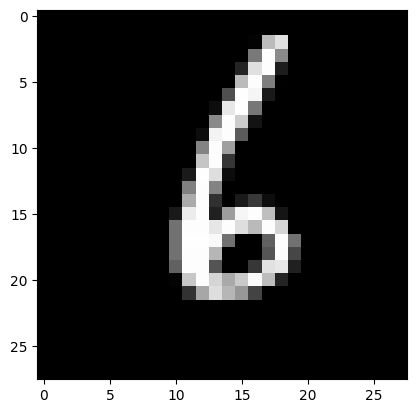

In [21]:
import random 

pred = random.randint(0, 1000 - 1)
test_prediction(pred, W1, b1, W2, b2)

Note: visualizer made using GPT-5

In [22]:
from matplotlib.collections import LineCollection

# ---------- pick one sample (accepts (n,), (n,1) or (n,m)) ----------
def _pick_single_example(X, idx=0):
    X = np.asarray(X)
    if X.ndim == 1:       # (n,)
        return X[:, None]
    if X.ndim == 2:
        if X.shape[1] == 1:
            return X      # (n,1)
        return X[:, [idx]]
    raise ValueError("X must be 1D or 2D array.")

# ---------- visualization with edge colors & per-layer node colors ----------
def visualize_full_network_single(
    W1, b1, W2, b2, X, idx=0, mark_prediction=True,
    input_dot_size=6, hidden_dot_size=160, output_dot_size=160,
    cmap_nodes=plt.cm.Reds, cmap_edges=plt.cm.coolwarm
):
    """
    784 -> 10 -> 10 for ONE example:
      - Nodes colored by activations (per-layer normalization).
      - Edges colored by weights (blue=neg, red=pos).
      - Predicted output circled in green (centered).
    """
    # --- forward pass on a single column ---
    X1 = _pick_single_example(X, idx=idx)           # (784,1)
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X1)
    a0 = X1[:, 0]                                   # (784,)
    a1 = A1[:, 0]                                   # (10,)
    a2 = A2[:, 0]                                   # (10,)
    pred = int(np.argmax(a2))

    # --- per-layer color norms (so output isn't washed out) ---
    norm_in  = plt.Normalize(a0.min(), a0.max() if a0.max() > a0.min() else a0.min()+1e-9)
    norm_h   = plt.Normalize(a1.min(), a1.max() if a1.max() > a1.min() else a1.min()+1e-9)
    norm_out = plt.Normalize(a2.min(), a2.max() if a2.max() > a2.min() else a2.min()+1e-9)

    # edge color norms by weight range
    norm_W1 = plt.Normalize(vmin=W1.min(), vmax=W1.max())
    norm_W2 = plt.Normalize(vmin=W2.min(), vmax=W2.max())

    # --- node positions ---
    n_in = a0.size
    y_in  = np.linspace(0, 1, n_in)
    y_h   = np.linspace(0, 1, 10)
    y_out = np.linspace(0, 1, 10)
    x_in, x_h, x_out = 0.0, 1.8, 3.6

    fig, ax = plt.subplots(figsize=(14, 7))

    # --- edges: Input -> Hidden (7840) ---
    segs_ih, colors_ih = [], []
    for j in range(10):
        start = np.column_stack([np.full(n_in, x_in), y_in])
        end   = np.column_stack([np.full(n_in, x_h),  np.full(n_in, y_h[j])])
        segs_ih.append(np.stack([start, end], axis=1))
        colors_ih.extend(W1[j, :].tolist())
    segs_ih = np.concatenate(segs_ih, axis=0)
    lc_ih = LineCollection(
        segs_ih, cmap=cmap_edges, norm=norm_W1, array=np.array(colors_ih),
        linewidths=0.25, alpha=0.55, rasterized=True
    )
    ax.add_collection(lc_ih)

    # --- edges: Hidden -> Output (100) ---
    segs_ho, colors_ho = [], []
    for i in range(10):
        start = np.array([[x_h, y_h[i]]])
        end   = np.column_stack([np.full(10, x_out), y_out])
        start = np.repeat(start, 10, axis=0)
        segs_ho.append(np.stack([start, end], axis=1))
        colors_ho.extend(W2[:, i].tolist())
    segs_ho = np.concatenate(segs_ho, axis=0)
    lc_ho = LineCollection(
        segs_ho, cmap=cmap_edges, norm=norm_W2, array=np.array(colors_ho),
        linewidths=0.9, alpha=0.9, rasterized=True
    )
    ax.add_collection(lc_ho)

    # --- nodes (per-layer color) ---
    sc_in  = ax.scatter(np.full(n_in,  x_in),  y_in,  s=input_dot_size,
                        c=a0, cmap=cmap_nodes, norm=norm_in,
                        edgecolors='none', zorder=3)
    sc_h   = ax.scatter(np.full(10,    x_h),   y_h,   s=hidden_dot_size,
                        c=a1, cmap=cmap_nodes, norm=norm_h,
                        edgecolors='k', linewidths=0.3, zorder=4)
    sc_out = ax.scatter(np.full(10,    x_out), y_out, s=output_dot_size,
                        c=a2, cmap=cmap_nodes, norm=norm_out,   # <-- colored now
                        edgecolors='k', linewidths=0.3, zorder=4)

    # --- highlight ONLY the predicted output (center-aligned) ---
    if mark_prediction:
        x_pred, y_pred = x_out, y_out[pred]
        ax.scatter([x_pred], [y_pred],
                   s=output_dot_size*1.35, marker='o',
                   facecolors='none', edgecolors='lime',
                   linewidths=2.5, zorder=6)

    # --- cosmetics ---
    ax.set_xlim(-0.6, 4.2)
    ax.set_ylim(-0.05, 1.05)
    ax.axis("off")
    ax.set_title("784 → 10 → 10 Network (one sample)\nNodes = activations (per-layer), Edges = weights")

    # Colorbars: one for weights, one for output activations
    cbar_edges = plt.colorbar(lc_ho, ax=ax, fraction=0.03, pad=0.08)
    cbar_edges.set_label("Weights (blue=neg, red=pos)")
    cbar_out = plt.colorbar(sc_out, ax=ax, fraction=0.03, pad=0.02)
    cbar_out.set_label("Output activation (softmax)")

    plt.tight_layout()
    plt.show()

NN Prediction:  0
Label:  9


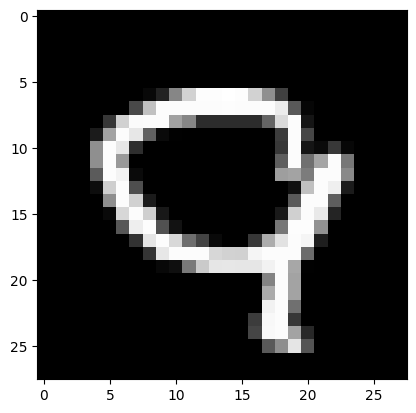

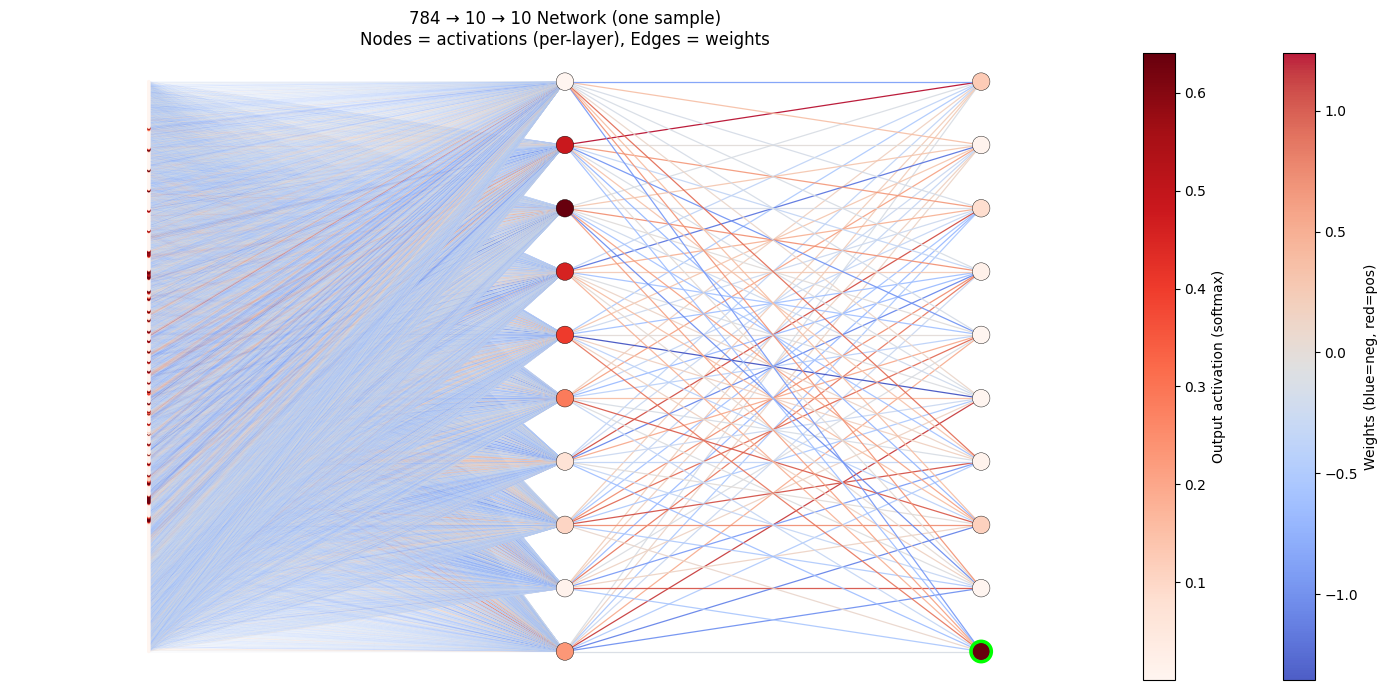

In [23]:
sample_idx = random.randint(0, 1000 - 1)
test_prediction(sample_idx, W1, b1, W2, b2)
visualize_full_network_single(W1, b1, W2, b2, X_dev, idx=sample_idx)